# Exercise 7.2 - Random Walk Simulation

## Problem Statement

Simulate a random walk in three dimensions allowing the walker to make steps of unit length in random directions; don't restrict the walker to sites on a discrete lattice. Show that the motion is diffusive, that is $\braket{r^2}$ ~ $t$. Find the value of the proportionality constant.

## The Process

1. Set the initial position of the random walker
2. Make use of the 'numpy.random.random' Random Number Generator to get 3 values between $[0, 1]$
3. Using each number for motion in the x, y, and z directions, a random value generated which is less than 0.5, the walker will move back 1 step in that direction, and a value greater than 0.5 will cause the walker to move forward 1 step in that direction.
4. Accumulate the squared displacement to the $r^2$ value
5. Finally, divide the sum of the squared displacements $r^2$ by the total number of random walks taken to get the mean squared displacement $\braket{r^2}$.
6. Compare to the number of steps $n$ allowed to take (or equivalently, the time $t$ that the walker walked). The ratio will approach double a constant number which represents the proportionality constant $D$ which I will be searching for. The formula is represented by

$$\braket{r^2} = 2 D t$$

So,

$$D = \frac{\braket{r^2}}{2 t} = \frac{\braket{r^2}}{2 n}$$

where $n$ denotes the step number.

### NOTE

Keep in mind that the full 3 dimensional space is free game to the random walker, and hence it should not be bound to stay within a certain range on any axis. In addition, the random walker is not limited to avoid its last position. Hence, non-self-avoiding model will be tested.


In [8]:
%matplotlib
# Random walker in 3D
from numpy.random import random
import numpy as np
import matplotlib.pyplot as plt

class Walker:
    def __init__(self):
        self.rSquared = np.array([0.0], float)
        self.stepNumber = 0
        self.position = np.array([0.0, 0.0, 0.0], float)
        self.positions = [
            [0.0],
            [0.0],
            [0.0]
        ]
        self.fig = plt.figure()
        self.fig.set_animated(True)
        self.ax = self.fig.add_subplot(111, projection = '3d')
    
    def TakeRandomStep(self):
        # Get the random numbers to indicate step motion and increment by a unit amount in that direction
        for i in range(3):
            _r = 1 if random() >= 0.5 else -1
            self.position[i] += _r
            self.positions[i].append(self.position[i].item())
        
        # Increase r^2 by the total squared distance from (0, 0, 0) after another random walk
        self.rSquared += sum(self.position * self.position)
        
        return None
    
    def Animate(self, nSteps : int):
        for n in range(nSteps):
            self.TakeRandomStep()
            # Increase the step number by 1 after a random step has been taken in each dimension
            self.stepNumber += 1
            self.ax.clear()
            self.ax.plot(self.positions[0], self.positions[1], self.positions[2], 'b-')
            self.fig.canvas.flush_events()
            plt.pause(0.0001)
            
        plt.close()
        
        return self.positions
    
    def EstimateD(self, N : int, nSteps : int):
        """Gets the proportionalty constant approximation by performing a random walk N times each with nSteps of random walks

        Args:
            N (int): number of times to run the random walk before accepting the average
            nSteps (int): number of steps to take per random walk

        Returns:
            D: the proportionality constant approximation
        """
        DTotal = 0.0
        iters = []
        for _ in range(N):
            for _ in range(nSteps):
                self.TakeRandomStep()
                self.stepNumber += 1
            
            # Accumulate the approximate D value
            meanRSquared = self.rSquared / nSteps
            DTotal += meanRSquared / (2 * nSteps)
            # and then reset the private variables to reset the random walk for another average
            self.rSquared = np.array([0.0], float)
            self.stepNumber = 0
            self.position = np.array([0.0, 0.0, 0.0])
            self.positions = [
                [0.0],
                [0.0],
                [0.0]
            ]
        
        # Return the average D value approximation AKA the approximated proportionality constant
        return DTotal.item() / N

walker = Walker()
randomWalkComplete = walker.Animate(nSteps = 1000)

Using matplotlib backend: MacOSX


: 

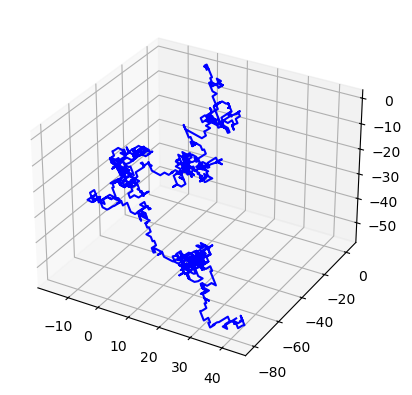

In [6]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot(randomWalkComplete[0], randomWalkComplete[1], randomWalkComplete[2], 'b-')
plt.show()

In [7]:
D = walker.EstimateD(N = 1000, nSteps = 1000)
print(f"The approximate value for the proportionality constant of a random walker in 3D is D = {D:.3f}")

The approximate value for the proportionality constant of a random walker in 3D is D = 0.763


## Conclusion

As seen above, the random walker in 3 dimensions iterated over 1000 different attempts to smooth the average shows that the proportionality constant $D \approx 0.76$ and slight deviations (on the order of $\pm 3 \times 10^{-2}$) with other trials runs that I have tested. Overall, it is clear that on average, the motion of a random walker approaches a path whose mean squared displacement is approximately equal to $2 D n$, where $D$ was found above, which applies to all 3 dimensional unit-step-size random walkers who have freedom to access all integral points in the x, y, z space.